# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem, but to make it simple : predicting a continuous (numerical) variable based on some other combination of variables.

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.10.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.utils import plot_model

Note : in order to use plot_model, one must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.

### Creating data to view and fit

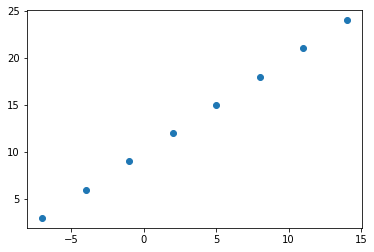

In [4]:
# Create features
X = np.array([-7., -4, -1, 2, 5, 8, 11, 14])

# Create labels
y = np.array([3., 6, 9, 12, 15, 18, 21, 24])

# Visualize it
plt.scatter(X,y)

In [5]:
X+10

array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])

In [6]:
y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [7]:
# Turning the NumPy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X.shape, y.shape

(TensorShape([8]), TensorShape([8]))

In [8]:
X

<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>

In [9]:
# Expand the dimension of a tensor : https://www.geeksforgeeks.org/python-tensorflow-expand_dims/
tf.expand_dims(X, axis=-1)

<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
array([[-7.],
       [-4.],
       [-1.],
       [ 2.],
       [ 5.],
       [ 8.],
       [11.],
       [14.]])>

### Steps in modeling in TensorFlow

1. **Creating the model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling the model** - define the `loss function` (the function which will tells our model how far it's from performing well), the `optimizer` (tells the model how to update its internal patterns to better its predictions) and the `evaluation metrics` (human interpretable values for how well the model is doing).
3. **Fitting the model** - letting the model try to find patterns between features and labels.
4. **Evaluation** - Evaluate the model on the test data (in order to know how reliable are the model's predictions)


In TensorFlow, there are two main way of creating a model :
* Sequential API
* Functional API

In [10]:
# Set a random seed (in order to have some reproducibility)
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # MAE : Mean Absolute Error
              optimizer=tf.keras.optimizers.SGD(), # SGD : Stochastic Gradient Descent
              metrics=["mae"]
             )

# 3. Fit the model 
model.fit(tf.expand_dims(X, axis=-1),y, epochs=5)


Epoch 1/5
1/1 [==============================] - 0s 336ms/step - loss: 12.2189 - mae: 12.2189
Epoch 2/5
1/1 [==============================] - 0s 3ms/step - loss: 12.0864 - mae: 12.0864
Epoch 3/5
1/1 [==============================] - 0s 3ms/step - loss: 11.9539 - mae: 11.9539
Epoch 4/5
1/1 [==============================] - 0s 3ms/step - loss: 11.8214 - mae: 11.8214
Epoch 5/5
1/1 [==============================] - 0s 5ms/step - loss: 11.6889 - mae: 11.6889


**Note**  
A lot of function in TensorFlow, if they have a shortcut name (e.g. mae or SGD), can be replaced by a string variable to define the fact it is wished to used that specific function. For e.g., the step 2 in the above cell( Compile the model), can also be written as such : 

model.compile(loss="mae",  
              optimizer="sgd",  
              metrics=["mae"]  
             )

In [11]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [12]:
# Trying to make a prediction using our model
model.predict([17.])

1/1 [==============================] - 0s 104ms/step


array([[9.247703]], dtype=float32)

The predicted value (y) should be 27 when X is 17. But we got -13.89, which is pretty far off. This is no surprising because the current MAE of our model is 17.3050, which means : on average, our model predict something that is 17.3050 points off where is should be (MAE).

In [13]:
y_pred = model.predict([17.])
y_pred

1/1 [==============================] - 0s 35ms/step


array([[9.247703]], dtype=float32)

In [14]:
y_pred + 17.3050

array([[26.552704]], dtype=float32)

The value is still off, our model is performing poorly.   
Now, we need to improve our model.

### Improving our model

We can improve our model by altering the steps we took to create a model.  

1. **Creating a model** - Here, we might :
* add more layers, 
* increase the number of hidden units (also called neurons) within each of th hidden layers, 
* change the activation function of each layer

2. **Compiling the model** - Here, we might :
* change the optimization function,
* or perhaps changes the **learning rate** of the optimization function

3. **Fitting the model** - Here, we might :
* fit the model for more epochs (make it train for longer)
* fit the model on more data (give the model more examples to learn from)

In [15]:
# 1st experiment : add a hidden layer, and more epochs, as an improvement to the model

# Set a random seed (in order to have some reproducibility)
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    
    # Adding more hidden layers, more neurons, and activation function 
    tf.keras.layers.Dense(100, activation="relu"),
    
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # MAE : Mean Absolute Error
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"]
             )

# 3. Fit the model 
model.fit(tf.expand_dims(X, axis=-1),y, epochs=100) # Increasing the number of epochs


Epoch 1/100
1/1 [==============================] - 0s 334ms/step - loss: 13.1669 - mae: 13.1669
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 12.5713 - mae: 12.5713
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 11.9713 - mae: 11.9713
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 11.3582 - mae: 11.3582
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 10.7343 - mae: 10.7343
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 10.0916 - mae: 10.0916
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 9.4250 - mae: 9.4250
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 8.7484 - mae: 8.7484
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 8.0294 - mae: 8.0294
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 7.2821 - mae: 7.2821
Epoch 11/100
1/1 [==============================] - 0s 5ms/step -

1/1 [==============================] - 0s 4ms/step - loss: 3.7263 - mae: 3.7263
Epoch 90/100
1/1 [==============================] - 0s 3ms/step - loss: 3.7166 - mae: 3.7166
Epoch 91/100
1/1 [==============================] - 0s 4ms/step - loss: 3.7395 - mae: 3.7395
Epoch 92/100
1/1 [==============================] - 0s 4ms/step - loss: 3.6892 - mae: 3.6892
Epoch 93/100
1/1 [==============================] - 0s 5ms/step - loss: 3.7484 - mae: 3.7484
Epoch 94/100
1/1 [==============================] - 0s 5ms/step - loss: 3.6834 - mae: 3.6834
Epoch 95/100
1/1 [==============================] - 0s 3ms/step - loss: 3.7346 - mae: 3.7346
Epoch 96/100
1/1 [==============================] - 0s 5ms/step - loss: 3.6923 - mae: 3.6923
Epoch 97/100
1/1 [==============================] - 0s 3ms/step - loss: 3.7070 - mae: 3.7070
Epoch 98/100
1/1 [==============================] - 0s 4ms/step - loss: 3.7071 - mae: 3.7071
Epoch 99/100
1/1 [==============================] - 0s 5ms/step - loss: 3.6855 - ma

The 1st experiment has resulted in a good improvement of the model

In [16]:
# Check how the model's prediction has improved...
model.predict([17.])

1/1 [==============================] - 0s 80ms/step


array([[31.863174]], dtype=float32)

In [17]:
# 2nd experiment : buil a larger model, as an improvement to the model

# Set a random seed (in order to have some reproducibility)
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    
    # Adding more hidden layers, more neurons, and activation function 
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # MAE : Mean Absolute Error
              optimizer=tf.keras.optimizers.Adam(lr=0.0001), # lr = Learning Rate
              metrics=["mae"]
             )

# 3. Fit the model 
model.fit(tf.expand_dims(X, axis=-1),y, epochs=300) # Increasing the number of epochs


Epoch 1/300


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1/1 [==============================] - 0s 390ms/step - loss: 13.6241 - mae: 13.6241
Epoch 2/300
1/1 [==============================] - 0s 7ms/step - loss: 13.5938 - mae: 13.5938
Epoch 3/300
1/1 [==============================] - 0s 5ms/step - loss: 13.5636 - mae: 13.5636
Epoch 4/300
1/1 [==============================] - 0s 8ms/step - loss: 13.5334 - mae: 13.5334
Epoch 5/300
1/1 [==============================] - 0s 4ms/step - loss: 13.5032 - mae: 13.5032
Epoch 6/300
1/1 [==============================] - 0s 6ms/step - loss: 13.4727 - mae: 13.4727
Epoch 7/300
1/1 [==============================] - 0s 6ms/step - loss: 13.4422 - mae: 13.4422
Epoch 8/300
1/1 [==============================] - 0s 5ms/step - loss: 13.4116 - mae: 13.4116
Epoch 9/300
1/1 [==============================] - 0s 5ms/step - loss: 13.3810 - mae: 13.3810
Epoch 10/300
1/1 [==============================] - 0s 5ms/step - loss: 13.3507 - mae: 13.3507
Epoch 11/300
1/1 [==============================] - 0s 5ms/step - los

1/1 [==============================] - 0s 5ms/step - loss: 11.2172 - mae: 11.2172
Epoch 88/300
1/1 [==============================] - 0s 3ms/step - loss: 11.1950 - mae: 11.1950
Epoch 89/300
1/1 [==============================] - 0s 5ms/step - loss: 11.1725 - mae: 11.1725
Epoch 90/300
1/1 [==============================] - 0s 4ms/step - loss: 11.1497 - mae: 11.1497
Epoch 91/300
1/1 [==============================] - 0s 5ms/step - loss: 11.1269 - mae: 11.1269
Epoch 92/300
1/1 [==============================] - 0s 3ms/step - loss: 11.1038 - mae: 11.1038
Epoch 93/300
1/1 [==============================] - 0s 4ms/step - loss: 11.0806 - mae: 11.0806
Epoch 94/300
1/1 [==============================] - 0s 4ms/step - loss: 11.0574 - mae: 11.0574
Epoch 95/300
1/1 [==============================] - 0s 4ms/step - loss: 11.0340 - mae: 11.0340
Epoch 96/300
1/1 [==============================] - 0s 5ms/step - loss: 11.0105 - mae: 11.0105
Epoch 97/300
1/1 [==============================] - 0s 4ms/step

1/1 [==============================] - 0s 5ms/step - loss: 8.1686 - mae: 8.1686
Epoch 174/300
1/1 [==============================] - 0s 5ms/step - loss: 8.1135 - mae: 8.1135
Epoch 175/300
1/1 [==============================] - 0s 3ms/step - loss: 8.0582 - mae: 8.0582
Epoch 176/300
1/1 [==============================] - 0s 7ms/step - loss: 8.0019 - mae: 8.0019
Epoch 177/300
1/1 [==============================] - 0s 9ms/step - loss: 7.9456 - mae: 7.9456
Epoch 178/300
1/1 [==============================] - 0s 5ms/step - loss: 7.8889 - mae: 7.8889
Epoch 179/300
1/1 [==============================] - 0s 4ms/step - loss: 7.8319 - mae: 7.8319
Epoch 180/300
1/1 [==============================] - 0s 6ms/step - loss: 7.7745 - mae: 7.7745
Epoch 181/300
1/1 [==============================] - 0s 3ms/step - loss: 7.7165 - mae: 7.7165
Epoch 182/300
1/1 [==============================] - 0s 5ms/step - loss: 7.6579 - mae: 7.6579
Epoch 183/300
1/1 [==============================] - 0s 4ms/step - loss: 7

1/1 [==============================] - 0s 4ms/step - loss: 3.7757 - mae: 3.7757
Epoch 261/300
1/1 [==============================] - 0s 4ms/step - loss: 3.7695 - mae: 3.7695
Epoch 262/300
1/1 [==============================] - 0s 3ms/step - loss: 3.7635 - mae: 3.7635
Epoch 263/300
1/1 [==============================] - 0s 5ms/step - loss: 3.7576 - mae: 3.7576
Epoch 264/300
1/1 [==============================] - 0s 4ms/step - loss: 3.7522 - mae: 3.7522
Epoch 265/300
1/1 [==============================] - 0s 4ms/step - loss: 3.7566 - mae: 3.7566
Epoch 266/300
1/1 [==============================] - 0s 5ms/step - loss: 3.7610 - mae: 3.7610
Epoch 267/300
1/1 [==============================] - 0s 3ms/step - loss: 3.7635 - mae: 3.7635
Epoch 268/300
1/1 [==============================] - 0s 5ms/step - loss: 3.7640 - mae: 3.7640
Epoch 269/300
1/1 [==============================] - 0s 3ms/step - loss: 3.7627 - mae: 3.7627
Epoch 270/300
1/1 [==============================] - 0s 4ms/step - loss: 3

The 2nd model, although more larger, don't provide a better training result compared to the previously built one.

In [18]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [19]:
# Check if the model's prediction has improved...
model.predict([17.])

1/1 [==============================] - 0s 71ms/step


array([[31.983078]], dtype=float32)

In [20]:
# 3rd experiment : add a hidden layer, more epochs, and review the learning rate, as an improvement to the model

# Set a random seed (in order to have some reproducibility)
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    
    # Adding more hidden layers, more neurons, and activation function 
    tf.keras.layers.Dense(100, activation="relu"),
    
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # MAE : Mean Absolute Error
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"]
             )

# 3. Fit the model 
model.fit(tf.expand_dims(X, axis=-1),y, epochs=100) # Increasing the number of epochs


Epoch 1/100
1/1 [==============================] - 0s 328ms/step - loss: 14.0668 - mae: 14.0668
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 13.2739 - mae: 13.2739
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 12.7226 - mae: 12.7226
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 12.1859 - mae: 12.1859
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 11.6556 - mae: 11.6556
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 11.1197 - mae: 11.1197
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 10.5789 - mae: 10.5789
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 10.0314 - mae: 10.0314
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 9.4825 - mae: 9.4825
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 8.9217 - mae: 8.9217
Epoch 11/100
1/1 [==============================] - 0s 4ms/s

Epoch 89/100
1/1 [==============================] - 0s 3ms/step - loss: 0.1847 - mae: 0.1847
Epoch 90/100
1/1 [==============================] - 0s 4ms/step - loss: 0.2696 - mae: 0.2696
Epoch 91/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2652 - mae: 0.2652
Epoch 92/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1188 - mae: 0.1188
Epoch 93/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3329 - mae: 0.3329
Epoch 94/100
1/1 [==============================] - 0s 4ms/step - loss: 0.2913 - mae: 0.2913
Epoch 95/100
1/1 [==============================] - 0s 4ms/step - loss: 0.1098 - mae: 0.1098
Epoch 96/100
1/1 [==============================] - 0s 8ms/step - loss: 0.1637 - mae: 0.1637
Epoch 97/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1992 - mae: 0.1992
Epoch 98/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1016 - mae: 0.1016
Epoch 99/100
1/1 [==============================] - 0s 5ms/step - loss

The loss is 0.1750; this model should perform really well.

In [21]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [22]:
# Check if the model's prediction has improved...
model.predict([17.])

1/1 [==============================] - 0s 67ms/step


array([[27.55838]], dtype=float32)

The model has predicted 26.918, while the real value is 27. We can conclude that the prediction is pretty well.  
**Observation** : adjusting the learning rate of our model has result in the best improvement so far.

**Model improvement rules** - When improving a model :
* **make many small changes** (experiments) and **test each one**, rather than always doing extremely large changes, because otherwise, if one does too big of a change, he might not be sure what caused the improvement or know improvement of the model.
* **the learning rate is potentially the most important hyper-parameter that can be changed** on a neural networks in order to improve it

## Evaluating a model


In practice, a typical workflow one goes through when buidling neural networks is :    
``` Build a model -> fit it -> evaluate it -> tweak a model -> fit it evaluate it -> tweak a model -> fit it -> evaluate it -> ... ```



When it comes to evaluation, there is one words one should memorize, and remember : **visualize**.

It's a good idea to visualize : 
* `The data` - what data are we working with ? What does it look like ?
* `The model` itself - what does our model look like ?
* `The training` of the model - how does the model perform while it learns ?
* `The predictions` of the model - how do the predictions of the model line up agains the real values ?


Let us dig into these steps here a bit further by working on a little bit of a larger problem.

In [23]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [24]:
# Make labels for the dataset

y = X + 10   # y = X + 10 is the formula(pattern) we want the model to learn
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

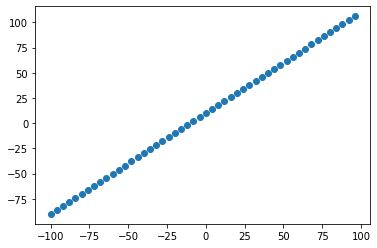

In [25]:
# Visualize the data

plt.scatter(X, y)

### The 03 set of data

* **Training set** - the model learns from this data, which is typically 70-80% of the total data available.
* **Validation set** - the model gets tuned on this data (it is the above mentionned *tweak the model*), which is typically 10-15% of the total data available.
* **Test set** - the model gets evaluated on this data to test what is has learned (to check how it performs on data is hasn't see before); this set is typically 10-15% of the available data.

In [26]:
# Check how many samples we have
nb_data = len(X)
nb_data

50

In [27]:
# Split the data into train and test sets

X_train = X[: int(nb_data*.8)] # 80% of the data
y_train = y[: int(nb_data*.8)] # 80% of the data

X_test = X[int(nb_data*.8):] # 20% of the data
y_test = y[int(nb_data*.8):] # 20% of the data


len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now that data was divided in training and testing sets, let's visualize it again.

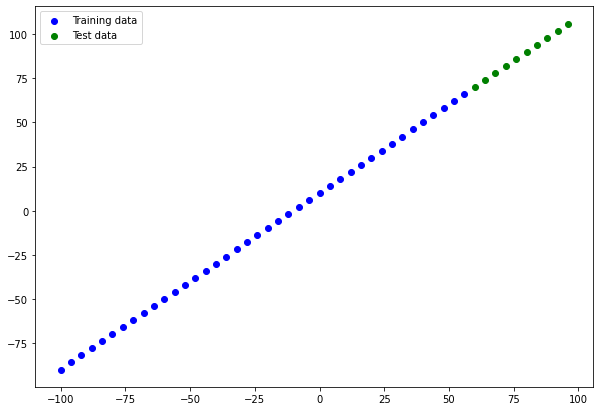

In [28]:
plt.figure( figsize=(10,7) )

# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")

# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Test data")

#Show a legend
plt.legend();

### Building a neural network

In [29]:
# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer= tf.keras.optimizers.SGD(),
             metrics=["mae"])



#### Visualizing the model

In [30]:
# Get an idea of what the model looks like before running it
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [31]:
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [32]:
X.ndim

1

In [33]:
X[0],y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

* The explanation of the Prof : X[0] contains a scalar, so the input_shape of our model is 1; in case X[0] contain for example 3 different numbers, then input_shape would be 3.    
* My own deduction : Another way to analyze it is based on the number of dimensions of X : X.ndim return 1, which means X is represented on one dimension, so the input shape is 1.

In [34]:
# Let's create a model which builds automatically by 
#    defining the input_shape argument in the first layer (that is what is usually done in practice)

tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape= [X.ndim] ) # tf.keras.layers.Dense(1, input_shape= [1] )
                                                     #     refer to the previous cell to get 
                                                     #      explanations on why input_shape= [1]   
]) 

# 2. COmpile the model 
model.compile(loss=tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.SGD(),
             metrics=["mae"])




In [35]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


.summary() on a model show the layers it contains, the output shape, and the number of parameters of each layer.   
   
* The **Ouput Shape** here (None, 1) : the representation here is something I personnally need to do more research on
* The **Layer Type** `Dense` : it is another word for `fully connected`. A fully connected layer means each neuron in the said layer connects to all neurons in the next layer.
* There are 2 **Params** :  
 - **Total params** : total number of parameters in the model; these are the patterns that the model is going to learn
 - **Trainable parameters** : these are the parameters (patterns) the model can update as it trains
 - **Non-trainable params** : these are the patterns the model cannot update as it trains; when we import a model that has already learned patterns in data (**transfer learning**), we might freeze those learned patterns so that the model retains what it already knows

📖 **Resource**: For a more in-depth overview of the trainable parameters within a layer, check out MIT's introduction to deep learning video at http://introtodeeplearning.com/ 

🛠️**Exercise**: Try playing around with the number of hdden units in the dense layer, see how that effects the number of parameters (total and trainable) by calling `model.summary()`

In [36]:
tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(3, input_shape= [1] )  
]) 

# 2. COmpile the model 
model.compile(loss=tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.SGD(),
             metrics=["mae"])


model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 3)                 6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [37]:
# Let us change the number of neuro from 3 to 1

tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape= [1] )  
]) 

# 2. COmpile the model 
model.compile(loss=tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.SGD(),
             metrics=["mae"])


model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [38]:
# 3. Fit the model to the training data for 100 epochs
model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 30.5738 - mae: 30.5738
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 9.7970 - mae: 9.7970
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 10.7482 - mae: 10.7482
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 9.5060 - mae: 9.5060
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 10.4075 - mae: 10.4075
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 9.6402 - mae: 9.6402
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 8.7449 - mae: 8.7449
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 9.0521 - mae: 9.0521
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 19.2019 - mae: 19.2019
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 10.3596 - mae: 10.3596
Epoch 11/100
2/2 [==============================] - 0s 3ms/step - los

2/2 [==============================] - 0s 3ms/step - loss: 10.5085 - mae: 10.5085
Epoch 89/100
2/2 [==============================] - 0s 3ms/step - loss: 7.2271 - mae: 7.2271
Epoch 90/100
2/2 [==============================] - 0s 2ms/step - loss: 12.6363 - mae: 12.6363
Epoch 91/100
2/2 [==============================] - 0s 2ms/step - loss: 7.2747 - mae: 7.2747
Epoch 92/100
2/2 [==============================] - 0s 2ms/step - loss: 7.6342 - mae: 7.6342
Epoch 93/100
2/2 [==============================] - 0s 3ms/step - loss: 7.0957 - mae: 7.0957
Epoch 94/100
2/2 [==============================] - 0s 3ms/step - loss: 12.4876 - mae: 12.4876
Epoch 95/100
2/2 [==============================] - 0s 3ms/step - loss: 9.8620 - mae: 9.8620
Epoch 96/100
2/2 [==============================] - 0s 2ms/step - loss: 9.1344 - mae: 9.1344
Epoch 97/100
2/2 [==============================] - 0s 3ms/step - loss: 12.1073 - mae: 12.1073
Epoch 98/100
2/2 [==============================] - 0s 2ms/step - loss: 9.0

In [39]:
# Fit the model again, for another 100 epochs (so for a total of 200 epochs)
model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 0s 3ms/step - loss: 11.2872 - mae: 11.2872
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 7.1977 - mae: 7.1977
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 14.2677 - mae: 14.2677
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 6.8633 - mae: 6.8633
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 9.4472 - mae: 9.4472
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 8.6524 - mae: 8.6524
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 7.7901 - mae: 7.7901
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 8.0754 - mae: 8.0754
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 18.5967 - mae: 18.5967
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 9.0843 - mae: 9.0843
Epoch 11/100
2/2 [==============================] - 0s 3ms/step - loss: 7

2/2 [==============================] - 0s 2ms/step - loss: 9.5524 - mae: 9.5524
Epoch 89/100
2/2 [==============================] - 0s 2ms/step - loss: 6.0087 - mae: 6.0087
Epoch 90/100
2/2 [==============================] - 0s 2ms/step - loss: 12.9218 - mae: 12.9218
Epoch 91/100
2/2 [==============================] - 0s 4ms/step - loss: 6.8689 - mae: 6.8689
Epoch 92/100
2/2 [==============================] - 0s 3ms/step - loss: 7.0999 - mae: 7.0999
Epoch 93/100
2/2 [==============================] - 0s 3ms/step - loss: 8.5273 - mae: 8.5273
Epoch 94/100
2/2 [==============================] - 0s 2ms/step - loss: 7.8770 - mae: 7.8770
Epoch 95/100
2/2 [==============================] - 0s 2ms/step - loss: 11.3686 - mae: 11.3686
Epoch 96/100
2/2 [==============================] - 0s 3ms/step - loss: 8.3898 - mae: 8.3898
Epoch 97/100
2/2 [==============================] - 0s 3ms/step - loss: 12.1462 - mae: 12.1462
Epoch 98/100
2/2 [==============================] - 0s 4ms/step - loss: 7.454

🔑 Every time model.fit() is called, it's going to fit for the extra epochs provided as parameters : the epochs are cumulative.

### Visualizing a model's layers

In [40]:
# Creating a new model, with 10 units in the hidden layers

tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape= [1] )  
]) 

# 2. Compile the model 
model.compile(loss=tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.SGD(),
             metrics=["mae"])


model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 10)                20        
                                                                 
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


In [41]:
# Fit the model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0)

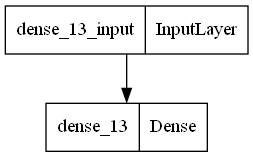

In [42]:
# Looking at the layers of the model
plot_model(model=model)

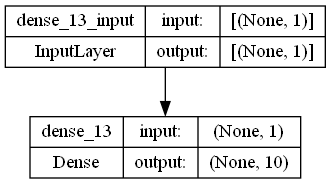

In [43]:
# Looking at the layers of the model, with it's shape
plot_model(model=model, show_shapes=True)

The plot_model() above will be very handy later on when we start creating more complex models with more hidden layers. 
   
Let's observe the plot of a little more complex model

In [44]:
# Creating a model, with 10 units in the hidden layers, and an output layer

tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape= [1], name="input_layer" ), 
    tf.keras.layers.Dense(1, name="output_layer")
], name="amazing_model") 

# 2. Compile the model 
model.compile(loss=tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.SGD(),
             metrics=["mae"])


model.summary()


Model: "amazing_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [45]:
# Fit the model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0)

In [46]:
model.summary()

Model: "amazing_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


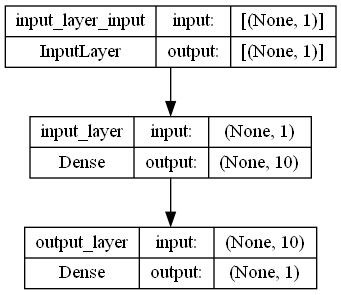

In [47]:
# Looking at the layers of the model, with it's shape
plot_model(model=model, show_shapes=True)

### Visualizing the model's predictions  
  
To visualize predictions, it's a good idea to plot them against the ground truth labels.  
  
Often, one will see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus the model's predictions).

In [48]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 48ms/step


array([[ 76.96753 ],
       [ 81.98646 ],
       [ 87.005394],
       [ 92.02433 ],
       [ 97.04326 ],
       [102.062195],
       [107.08113 ],
       [112.10006 ],
       [117.11899 ],
       [122.13794 ]], dtype=float32)

In [49]:
# Looking at the content of y_test (the real value)
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [50]:
# Creating a plotting function
def plot_predictions(train_data=X_train, train_labels=y_train,
                    test_data=X_test, test_labels=y_test,
                    predictions=y_pred):
    """
        Plots training data, test data, and compares predictions to ground truth labels.
    """
    plt.figure( figsize=(10,7) )

    # Plot training data in blue 
    plt.scatter(train_data, train_labels, c="b", label="Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", label="Test data")
    
    # Plot prediction data
    plt.scatter(test_data,predictions,c="r", label="Predictions")

    #Show a legend
    plt.legend() 

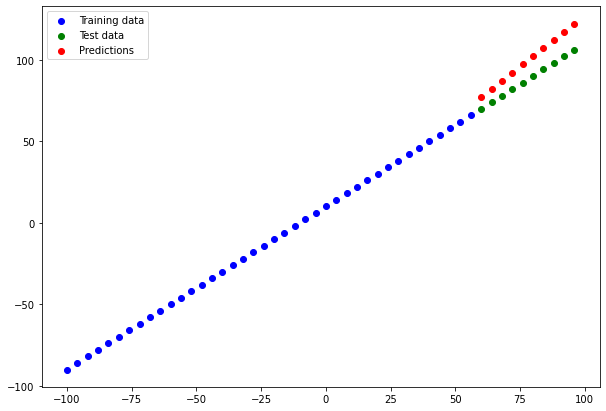

In [51]:
plot_predictions()

Looking at the plots, the model appear to be good since the distance between test data and the predictions is small. But depending on the scale of the plot, that seemingly short distance can in fact represent a fairly large error.   
So the way that can be figured out is by some evaluation metrics.


🛠️ **Exercise** : Try to improve the ploted model performance.

### Evaluation a model's predictions with regression evaluation metrics  
  
The best way to evaluate a model's predictions is by using evaluation metrics. Depending on the problem one is working on, there will be different evaluation metrics to evaluate a model's performance.
   
   
Since the current work is a regression, three of the main metrics are :
* **MAE** - Mean Absolute Error : "On evareage, how wrong is each of the model's predictions ?" . It is a great starter metric for any regression problem.
* **MSE** - Mean Square Error : "Square the average errors" (take the errors from the model predictions, square them, and find the average). It is great to use it when larger errors are more significant than smaller errors.   
* **Huber** : It is a combination of MSE and MAE; it's less sensitive to outliers than MSE.

In [58]:
# Evaluate the model on the test 
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 119ms/step - loss: 11.5527 - mae: 11.5527


[11.552728652954102, 11.552728652954102]

In the evaluation's result above, there are values for `loss` and `mae`. They came from the hyper-parameters (loss and metrics) provided when building the model.

#### Manually calculate the MAE (as an exercise)

In [59]:
mae = tf.metrics.mean_absolute_error(y_true = y_test, y_pred=y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([13.019483, 10.805417, 10.      , 10.404866, 12.017303, 14.849756,
       19.081131, 24.10006 , 29.118988, 34.13794 ], dtype=float32)>

The result above does not make sense, because the result should be scalar, not an array . Let us observe y_test and y_pred to understand what is going on in the data.

In [60]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [61]:
y_pred

array([[ 76.96753 ],
       [ 81.98646 ],
       [ 87.005394],
       [ 92.02433 ],
       [ 97.04326 ],
       [102.062195],
       [107.08113 ],
       [112.10006 ],
       [117.11899 ],
       [122.13794 ]], dtype=float32)

In [62]:
y_pred.shape

(10, 1)

y_pred has one more dimension than y_test, so we need to remove its last dimension in order to have the same dimension for the two of them.

In [63]:
# remove the last dimension from y_pred
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 76.96753 ,  81.98646 ,  87.005394,  92.02433 ,  97.04326 ,
       102.062195, 107.08113 , 112.10006 , 117.11899 , 122.13794 ],
      dtype=float32)>

In [64]:
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred = tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=11.552729>

The MAE manually computed here is the same as the one computed automatically before.

#### Manually calculate the MSE (as an exercise)

In [65]:
mse = tf.metrics.mean_squared_error(y_true=y_test, y_pred=y_pred)
mse

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 253.71542,  168.16269,  132.98923,  148.19522,  213.78052,
        329.7453 ,  496.08954,  712.81287,  979.9154 , 1297.3989 ],
      dtype=float32)>

We have the same situation as when manually calculing MAE. We will use `tf.squeeze()` to solve the issue.

In [66]:
mse = tf.metrics.mean_squared_error(y_true=y_test, y_pred= tf.squeeze(y_pred) )
mse

<tf.Tensor: shape=(), dtype=float32, numpy=142.0309>

MSE will typically be higher than MAE because, if we look at their formula, there is a square operation in MSE.

#### Define a function for MAE and MSE
It is so that the two of them can be used later

In [67]:
def mae(y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true=y_true, y_pred = y_pred)

def mse(y_true, y_pred):
    return tf.metrics.mean_squared_error(y_true=y_test, y_pred=y_pred)

### Running experiments to improve a model

So far :
* some predictions where made with a trained model, 
* the predictions where compared to test data set, and the comparaison was visualized,
* the predictions where where evaluated with regression evaluation metrics, such as MAE and MSE.

The next question is : "**How do we get the error values lower ?** (How do we minimize the difference between the model's predictions and the test labels)". 

Remembering the workflow discussed before : `Build a model -> fit it -> evaluate it -> tweak it -> fit it -> tweak it -> ... `

If the Machine Learning explorer's motto is `visualize, visualize, visualize`, in other words :
* Visualizing our data
* Visualizing our model
* Visualizing our training
* Visualizing our prediction

Then, the Machine Learning practitioner's motto is `experiment, experiment, experiment, ...`. That is what we are going to do : try to run a few series of experiments to see if we can improve our model following the above mentioned workflow.

Recalling some ways that we can improve our model :
1. **Get more data** - get more examples for your model to train on (in other words, more opportunities to learn patterns/relationships between features and labels).
1. **Make the model larger** (using a more complex model) -  this might come in the form of more layers, or more hidden units in each layer, or both.
1. **Train for longer** - give the model more of a chance to find patterns in the data
1. **Review how the model is compiled** - change the optimization function, or learning rate of the optimization function

In [52]:
# Recalling our dataset
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56])>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66])>)

The question now is `Looking at our datas, how can we improve our model ?`. Let us review our options :   

1. Get more data ? We can't really get more data unless we just artificially make our datasest bigger, so this option is ruled out.
1. Make the model larger ? Yes we can
1. Train for longer ? Yes, we can
1. Review how the model is compiled ? Yes we can

In regard for this, let's design 03 experiments that we could do: 
1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
1. `model_2` - 2 layers, trained for 100 epochs.
1. `model_3` - 2 layers, trained for 500 epochs.

The mindset of a Machine Learning practitioner is to start with a baseline model, and then change one of the parameters for his next experiment, then do the same for the next experiment, and so on.

**Creating model_1**: 1 layer, trained for 100 epochs

In [55]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train,axis=-1), y_train, epochs=100);

Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 26.6221 - mae: 26.6221
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 8.5930 - mae: 8.5930
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 10.8330 - mae: 10.8330
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 11.2925 - mae: 11.2925
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 12.5404 - mae: 12.5404
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 9.6973 - mae: 9.6973
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 8.7927 - mae: 8.7927
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 9.0568 - mae: 9.0568
Epoch 9/100
2/2 [==============================] - 0s 2ms/step - loss: 19.3200 - mae: 19.3200
Epoch 10/100
2/2 [==============================] - 0s 2ms/step - loss: 10.4259 - mae: 10.4259
Epoch 11/100
2/2 [==============================] - 0s 3ms/step - l

2/2 [==============================] - 0s 2ms/step - loss: 11.4986 - mae: 11.4986
Epoch 89/100
2/2 [==============================] - 0s 2ms/step - loss: 7.7893 - mae: 7.7893
Epoch 90/100
2/2 [==============================] - 0s 2ms/step - loss: 10.9124 - mae: 10.9124
Epoch 91/100
2/2 [==============================] - 0s 2ms/step - loss: 6.7365 - mae: 6.7365
Epoch 92/100
2/2 [==============================] - 0s 2ms/step - loss: 10.1048 - mae: 10.1048
Epoch 93/100
2/2 [==============================] - 0s 2ms/step - loss: 7.5981 - mae: 7.5981
Epoch 94/100
2/2 [==============================] - 0s 2ms/step - loss: 9.2301 - mae: 9.2301
Epoch 95/100
2/2 [==============================] - 0s 2ms/step - loss: 10.8221 - mae: 10.8221
Epoch 96/100
2/2 [==============================] - 0s 2ms/step - loss: 10.2790 - mae: 10.2790
Epoch 97/100
2/2 [==============================] - 0s 2ms/step - loss: 7.6710 - mae: 7.6710
Epoch 98/100
2/2 [==============================] - 0s 2ms/step - loss: 8

1/1 [==============================] - 0s 32ms/step


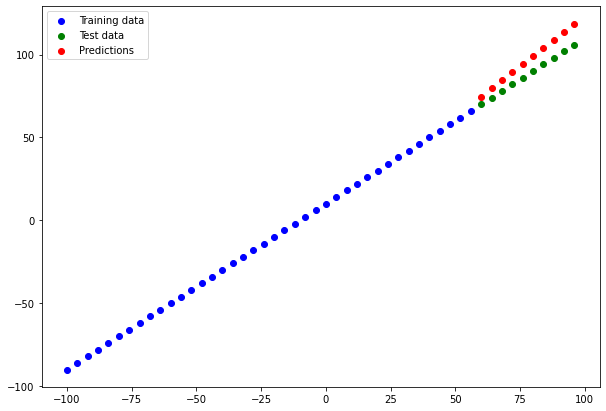

In [56]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(tf.expand_dims(X_test,axis=-1))
plot_predictions(train_data=X_train,train_labels=y_train,test_data=X_test, test_labels=y_test,predictions=y_preds_1)

In [69]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, tf.squeeze(y_preds_1))
mse_1 = mse(y_test, tf.squeeze(y_preds_1))
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=8.681193>,
 <tf.Tensor: shape=(), dtype=float32, numpy=81.90356>)

**Creating model_2**: 2 dense layers, trained for 100 epochs